/tmp/ipykernel_1912772/2302382755.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(u, v, eig, levels=[np.min(f[i](u, v, a)), 0],  colors=color, alpha=0.3, label="Type-I")
/tmp/ipykernel_1912772/2302382755.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  l1 = ax.contourf(u, v, eig, levels=[np.min(f[i](u, v, a)), 0],  colors=color, alpha=0.6, hatches=["///"], label="Type-II")


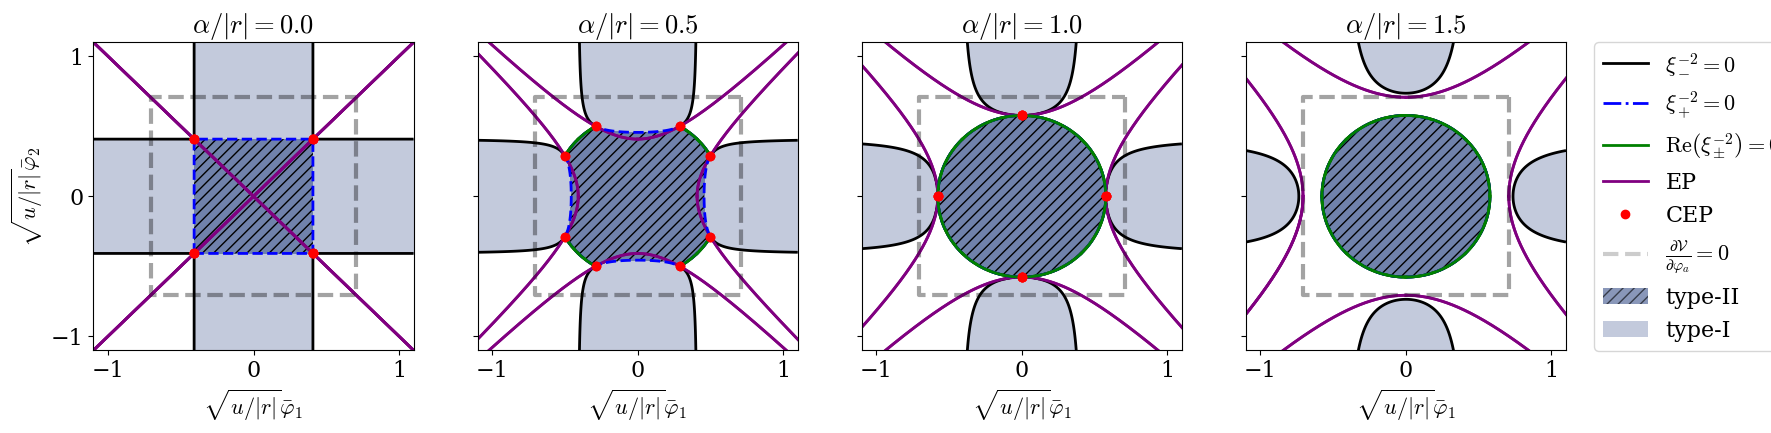

In [95]:
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import pi, sin, cos


plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)
plt.rc("font", family="serif", size=16)

rgba_to_hex = lambda rgba : '#'+''.join([f'{int(v*255):02x}' for v in rgba])
color = rgba_to_hex(cm.viridis(.25))

aa = [0, 0.5, 1, 1.5]
N = 500
L = 1.1
u, v = np.linspace(-L, L, N), np.linspace(-L, L, N) 
u, v = np.meshgrid(u, v)

f1 = lambda u, v, a :  (- 1 + 3 * (u**2 + v**2) - sqrt((3 * (u**2 - v**2))**2 - a**2 + 0j)).real
f2 = lambda u, v, a :  (- 1 + 3 * (u**2 + v**2) + sqrt((3 * (u**2 - v**2))**2 - a**2 + 0j)).real
f = [f1, f2]

g = lambda v, a: sqrt(v**2 + a/3)
v0 = np.linspace(0, L, 500)
sgn1 = [1, 1, -1, -1]
sgn2 = [1, -1, 1, -1]

fig, axs = plt.subplots(1, len(aa),figsize=(19, 4), sharex=True, sharey=True) 

for j, a in enumerate(aa):
    for i in range(2):
        ax = axs[j]
        u0 = g(v0, a)
        for s1, s2 in zip(sgn1, sgn2):
            ax.plot(s1*v0, s2*u0, "-", color="purple")
            ax.plot(s1*u0, s2*v0, "-", color="purple")

        eig = f[i](u, v, a)
        if i==0:
            ax.contour(u, v, eig, levels=[0], colors="black", linestyles="-")
            ax.contourf(u, v, eig, levels=[np.min(f[i](u, v, a)), 0],  colors=color, alpha=0.3, label="Type-I")
        elif i==1:
            ax.contour(u, v, eig, levels=[0], colors="blue", linestyles="--")
            l1 = ax.contourf(u, v, eig, levels=[np.min(f[i](u, v, a)), 0],  colors=color, alpha=0.6, hatches=["///"], label="Type-II")

        if a>0:
            lim = max(0,(1 - a)/6)
            v1 = np.linspace(np.sqrt(lim), np.sqrt(1/6), 100)
            v2 = np.sqrt(1/3 - v1**2)
            for s1, s2 in zip(sgn1, sgn2):
                ax.plot(s1*v1, s2*v2, color="green")
                ax.plot(s1*v2, s2*v1, color="green")

        if a <= 1:
            CEP1 = np.sqrt((1 + a) / 6)
            CEP2 = np.sqrt((1 - a) / 6)
            for s1, s2 in zip(sgn1, sgn2):
                ax.plot(s1*CEP1, s2*CEP2, 'ro')
                ax.plot(s1*CEP2, s2*CEP1, 'ro')
        
        sq = 1 / sqrt(2)
        ax.plot([sq, sq, -sq, -sq, sq], [sq, -sq, -sq, sq, sq], 'k--', alpha=.2, lw=3)

        ax.set_xlabel("$\\sqrt{u/|r|}\\bar\\varphi_1$")
        if j==0:
            ax.set_ylabel("$\\sqrt{u/|r|}\\bar\\varphi_2$")
        ax.set_xlim(-L, L)
        ax.set_ylim(-L, L)
        ax.set_title("$\\alpha/|r| = %.1f$"%(a))

axs[0].set_yticks(np.linspace(-1,1,3))



ax.plot([], [], "k-", label='$\\xi_-^{-2} = 0$')
ax.plot([], [], "b-.", label='$\\xi_+^{-2} = 0$')
ax.plot([], [], 'g-', label='$\\mathrm{Re} \\left(\\xi_\\pm^{-2} \\right) = 0$')
ax.plot(s1*u0, s2*v0, "-", color="purple", label="EP")
ax.plot([], [], 'ro', label="CEP")
ax.plot([], [], 'k--', alpha=.2, lw=3, label="$\\frac{\\partial \\mathcal{V}}{\\partial \\varphi_a }=0$")
ax.fill_between([],[],[], color=color, alpha=0.6,label="type-II", hatch='///', linewidth=0.0, edgecolor='#00000000')
ax.fill_between([],[],[], color=color, alpha=0.3,label="type-I", linewidth=0.0)

fig.legend(loc=(.9,.19))
# plt.tight_layout()
fig.savefig('fig/assym/assym.svg', bbox_inches="tight")
plt.show()

/tmp/ipykernel_1912772/2981800649.py:1: RuntimeWarning: invalid value encountered in sqrt
  v2 = lambda v1, a : sqrt(1 / 6 * (6*v1**2 - (1 + a**2)) / (6*v1**2 - 1))


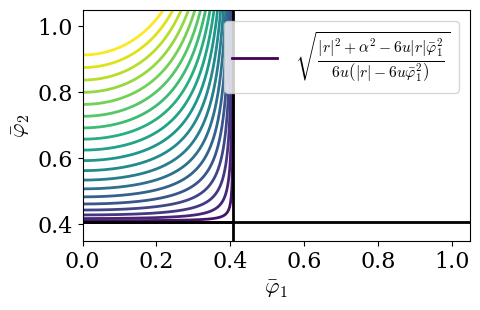

In [21]:
v2 = lambda v1, a : sqrt(1 / 6 * (6*v1**2 - (1 + a**2)) / (6*v1**2 - 1))
n = 20
aa = np.linspace(0, 2., n)
fig, ax = plt.subplots(figsize=(5, 3))
ls = []
for i, a in enumerate(aa):
    v1 = np.linspace(0, 1 / sqrt(6), 500)
    ls.append(ax.plot(v1, v2(v1, a), color=cm.viridis(i/(n-1))))

ax.set_ylim(0.35, 1.05)
ax.set_xlim(0, 1.05)
ax.set_xticks(np.linspace(0,1,6))
ax.plot([0, 1.1], [1/sqrt(6), 1/sqrt(6)], 'k')
ax.plot([1/sqrt(6), 1/sqrt(6)],[.3, 2], 'k')
ax.set_xlabel("$\\bar\\varphi_1$")
ax.set_ylabel("$\\bar\\varphi_2$")

ax.legend(ls[0],["$\\sqrt{ \\frac{|r|^2 + \\alpha^2 - 6 u |r| \\bar \\varphi_1^2}{6u \\left(|r| - 6 u\\bar \\varphi_1^2\\right) } }$",])
fig.savefig('fig/assym/critical.pdf',bbox_inches="tight")
plt.show()